For my Dynamics project I made a CAD file in Solidworks based off of a video of an ornithopter which can be seen here: https://youtu.be/XqPB6HIMAJk. Next I made an animation of my CAD file within Solidworks, a short video of which can be seen at https://drive.google.com/file/d/13E7Dt-jSmOvGVbwxnC4uA4kEai5K3BB1/view?usp=sharing. (I couldn't figure out how to make the video play in here). Once I had that video I used a software called tracker which can track the motion of a point within a video and output that data as a .csv file. A screenshot of the software interface can be seen below.

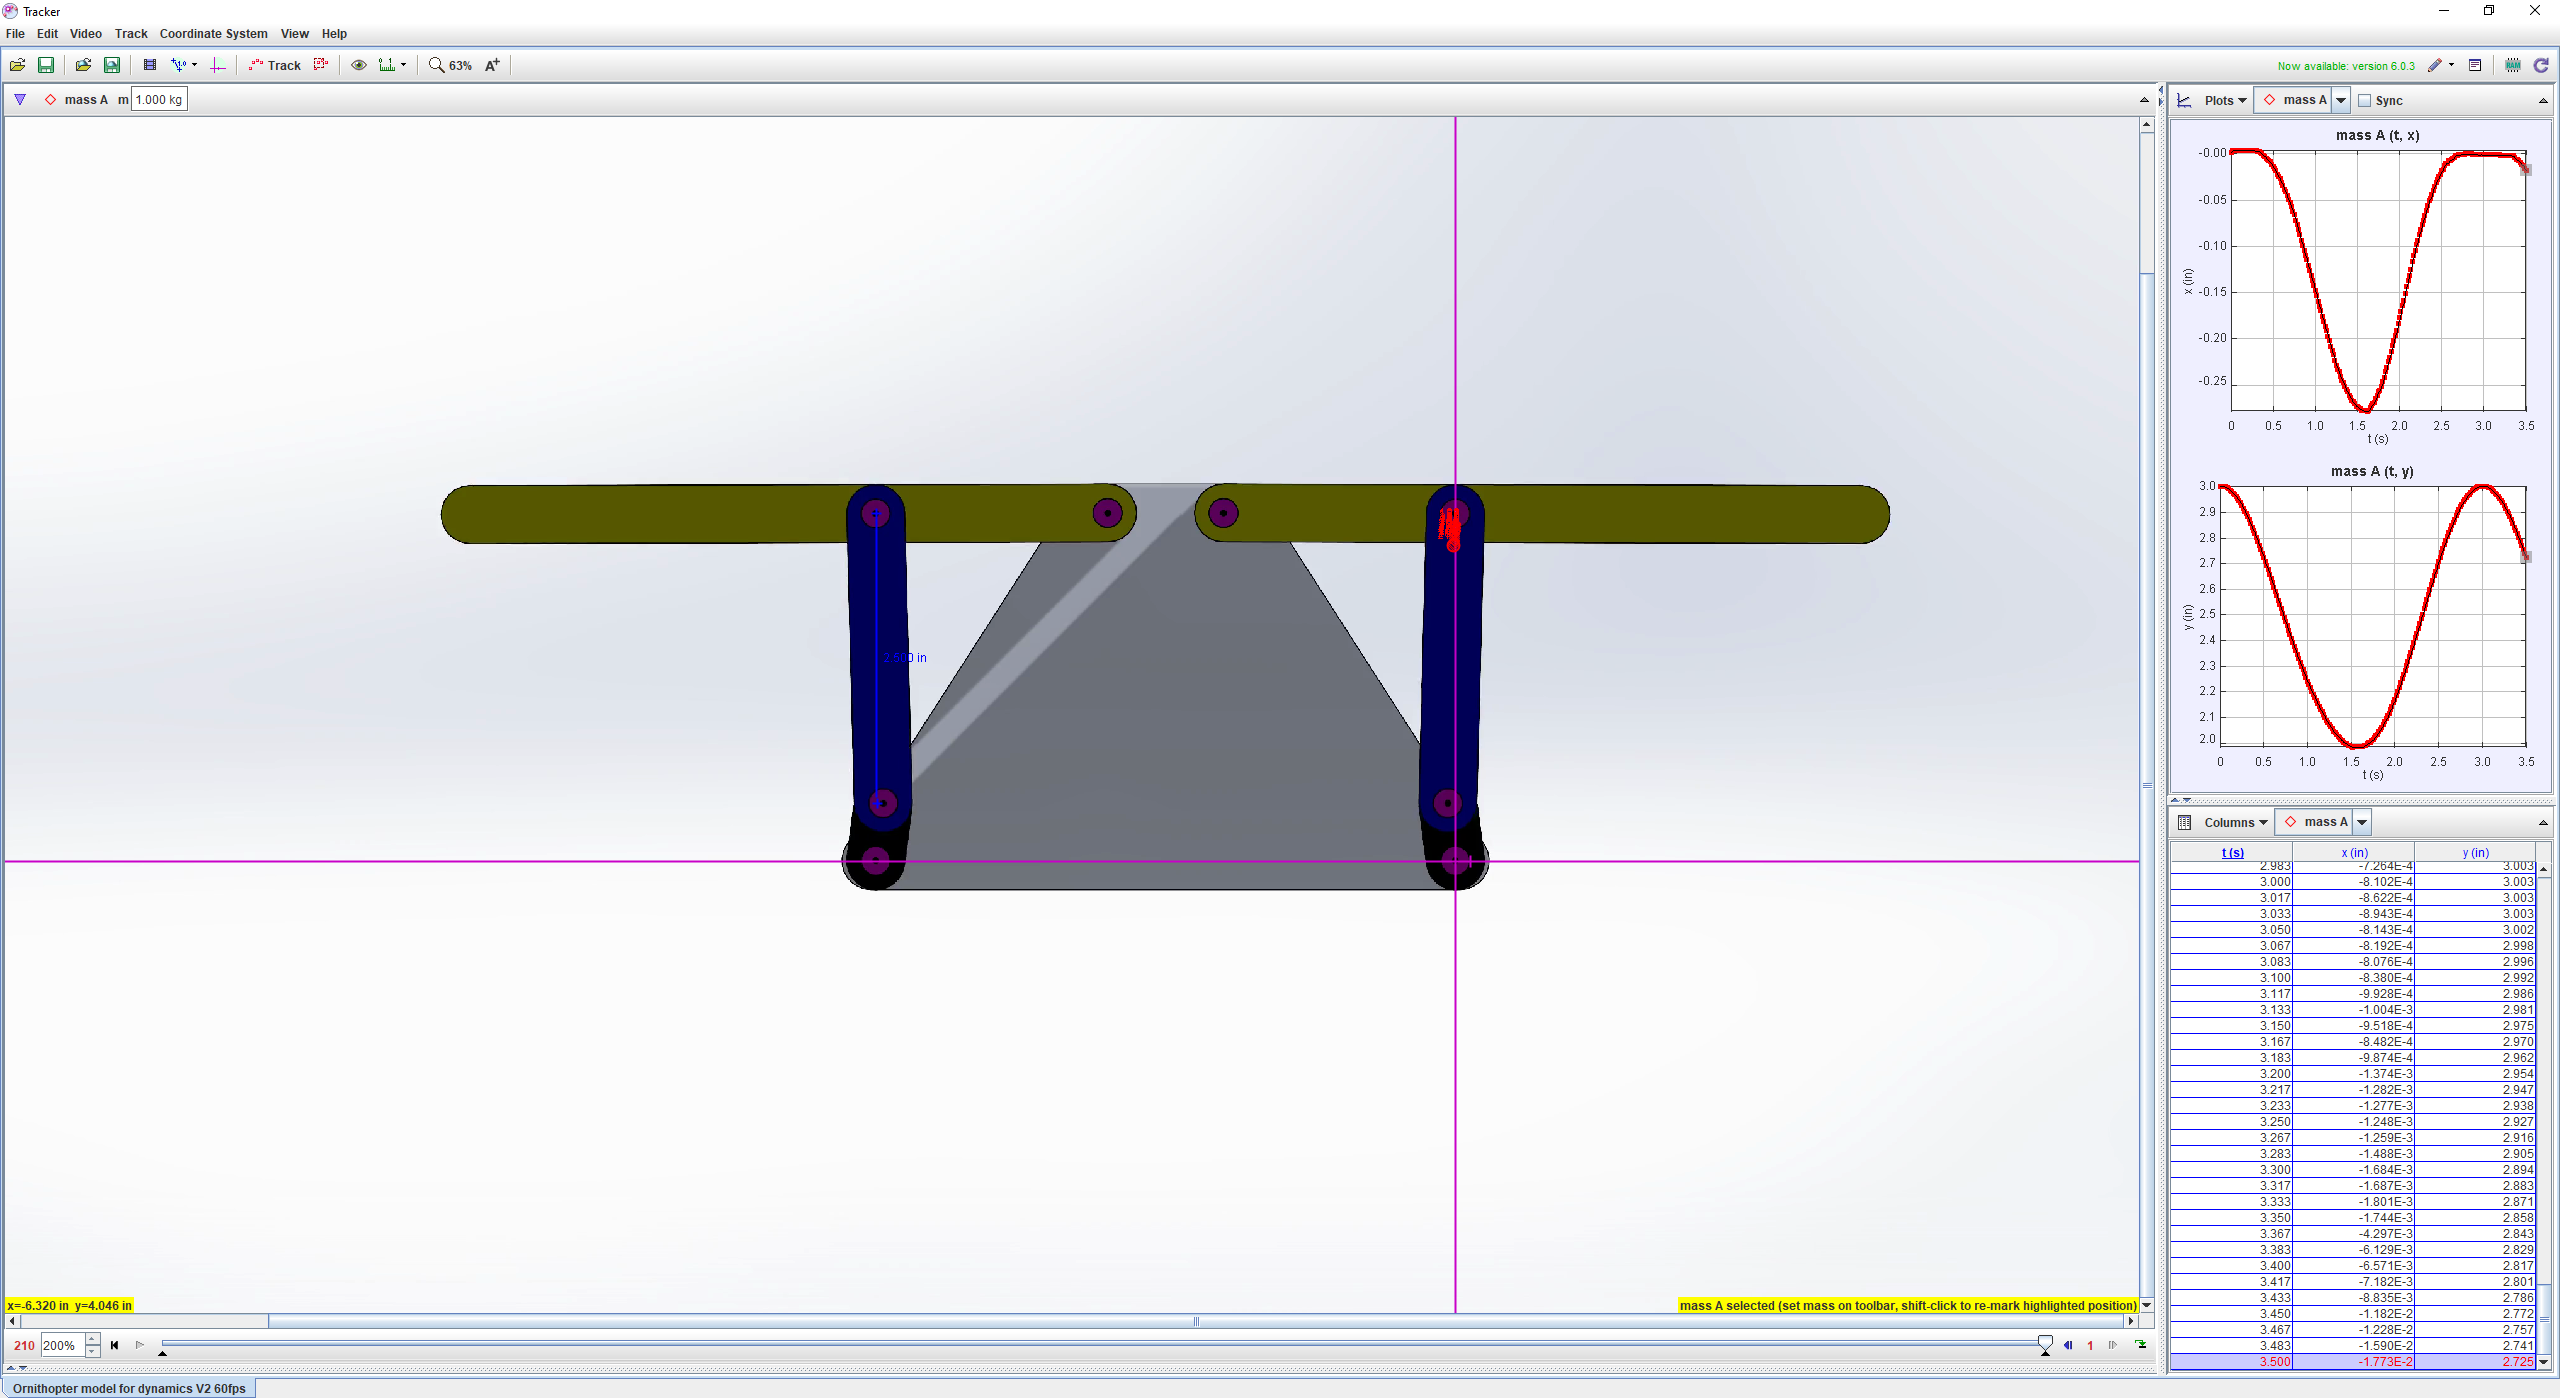

The idea is that using this tracker data I can generate a graph for the velocity and acceleration of the point of interest and then compare that to the velocity and acceleration that my groupmates obtain through theoretical calculations. 

The first thing that needs to be done is importing the relevant libraries. Specifically I will be using numpy and matplotlib.pyplot

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Next I need to import the data from tracker using the np.genfromtxt function. I will also be using the np.nan_to_num function in order to clean up the data and make sure that there are no blanks which can cause errors in the code. 

In [ ]:
tracker_data = np.genfromtxt(fname = 'Ornithopter V2.txt', delimiter = ",", skip_header=2)
tracker_data = np.nan_to_num(tracker_data, nan=0.0) 

Next the code defines time as the first column of the tracker data, x as the second column, and y as the third. 

In [ ]:
time =  tracker_data [:,0]            
x = tracker_data[:,1]                 
y = tracker_data[:,2]  

NameError: ignored

Next the code will plot the position data.

In [ ]:
plt.plot(time,x,color = 'green', label = "x position")
plt.xlabel("Time(seconds)")
plt.plot(time,y,color='blue',label = "y position")
plt.ylabel("Position (in)")
plt.xlim([0,3.5])
plt.ylim([-0.5,3.5])
plt.title("Position vs Time")
plt.legend()
plt.grid(True)
plt.show()

Next I find the velocity by taking the derivate of position devided by the derivative of time. I also had to delete the last time data point because python kept giving me an error that it cant plot one array against another if those two arrays have a different number of entries. 

In [ ]:
dt = np.diff(time)
dx = np.diff(x)
dy = np.diff(y)
vx = dx/dt
vy = dy/dt
time = np.delete(time, 210)

Next the code will plot the velocity data

In [ ]:
plt.plot(time, vx,color = 'red', label = "x velocity")
plt.xlabel("Time(seconds)")
plt.plot(time, vy, color='purple',label = "y velocity")
plt.ylabel("Velocity (in/s)")
plt.title("Velocity vs Time")
plt.legend()
plt.grid(True)
plt.show()

Then I found the acceleration by taking the derivative of the derivative of position and dividing it by the derivative of the derivative of time. I once again had to delete the last time entry for the same reason.

In [ ]:
ddt = np.diff(dt)
ddx = np.diff(dx)
ddy = np.diff(dy)
ax = ddx/ddt
ay = ddy/ddt
time = np.delete(time, 209)

Next the code will plot the acceleration data.

In [ ]:
plt.plot(time, ax,color = 'red', label = "x acceleration")
plt.xlabel("Time(seconds)")
plt.plot(time, ay, color='purple',label = "y acceleration")
plt.ylabel("Acceleration in/s^2)")
plt.title("Acceleration vs Time")
plt.legend()
plt.grid(True)
plt.show()

And finally here is the entire code. The only requirement for it to run properly should be having the 'Ornithopter V2.txt' file in the same folder as the code. The quality of the position graph that it outputs is very very good. The velocity graph is still good but has some noise in it. The graph for acceleration is almost unusable, this seems to be as a result of the way that the data was processed and the fact that I started with a file that only has 60 data points per second.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#IMPORT DATA
tracker_data = np.genfromtxt(fname = 'Ornithopter V2.txt', delimiter = ",", skip_header=2)
tracker_data = np.nan_to_num(tracker_data, nan=0.0) 
time =  tracker_data [:,0]            #pull out time data from tracker
x = tracker_data[:,1]                 #pull out x position data from tracker
y = tracker_data[:,2]                 #pull out y position data from tracker

plt.plot(time,x,color = 'green', label = "x position")
plt.xlabel("Time(seconds)")
plt.plot(time,y,color='blue',label = "y position")
plt.ylabel("Position (in)")
plt.xlim([0,3.5])
plt.ylim([-0.5,3.5])
plt.title("Position vs Time")
plt.legend()
plt.grid(True)
plt.show()

dt = np.diff(time)
dx = np.diff(x)
dy = np.diff(y)
vx = dx/dt
vy = dy/dt
time = np.delete(time, 210)

plt.plot(time, vx,color = 'red', label = "x velocity")
plt.xlabel("Time(seconds)")
plt.plot(time, vy, color='purple',label = "y velocity")
plt.ylabel("Velocity (in/s)")
plt.title("Velocity vs Time")
plt.legend()
plt.grid(True)
plt.show()

ddt = np.diff(dt)
ddx = np.diff(dx)
ddy = np.diff(dy)
ax = ddx/ddt
ay = ddy/ddt
time = np.delete(time, 209)

plt.plot(time, ax,color = 'red', label = "x acceleration")
plt.xlabel("Time(seconds)")
plt.plot(time, ay, color='purple',label = "y acceleration")
plt.ylabel("Acceleration in/s^2)")
plt.title("Acceleration vs Time")
plt.legend()
plt.grid(True)
plt.show()